# 2-5. Low-dimensional analysis of a Mouse Pancreas data

In [1]:
import os
import glob
import sys
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns

sys.path.append('../')
import src.utils as my_u
from src.utils import df_cp
from src.utils import df_log
from src.utils import df_total20000
from src.utils import df_minmax
from src.utils import df_minmax_scaler
from src.utils import df_l2norm
from src.utils import df_zscore
from src.utils import df_meansquare
from src.utils import run_plot


file_list = glob.glob("../dataset/baron/RAW/*mouse*counts.csv")
print(file_list)

['../dataset/baron/RAW/GSM2230761_mouse1_umifm_counts.csv', '../dataset/baron/RAW/GSM2230762_mouse2_umifm_counts.csv']


In [2]:
total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep=',', index_col=0, header=0)
    total_data = total_data.append(data)
    print(total_data.shape)

labels = total_data['assigned_cluster'].values.tolist()
label_set = set(labels)
print(label_set)

total_data = total_data.iloc[:,2:]

(822, 14880)
(1886, 14880)
{'delta', 'T_cell', 'macrophage', 'alpha', 'B_cell', 'ductal', 'schwann', 'beta', 'gamma', 'endothelial', 'activated_stellate', 'quiescent_stellate', 'immune_other'}


## MP-t-SNE:K-MEAN results

kmean #cluster: (8, 0.4082374921160296, 0.49197552, 0)
kmean #cluster: (8, 0.6035841092195113, 0.5231845, 0)
kmean #cluster: (7, 0.478903405147542, 0.5181277, 0)
kmean #cluster: (10, 0.17135322242021822, 0.4280268, 0)
kmean #cluster: (6, 0.5784086323407653, 0.5442881, 0)
kmean #cluster: (12, 0.33155818557973354, 0.4657428, 0)
kmean #cluster: (6, 0.5816957928767191, 0.52717143, 0)
kmean #cluster: (13, 0.16288875573648656, 0.35278684, 0)
kmean #cluster: (6, 0.5847491064437715, 0.54773253, 0)
kmean #cluster: (7, 0.7556520303291214, 0.5395021, 0)
kmean #cluster: (7, 0.5927023652659075, 0.55194515, 0)
kmean #cluster: (11, 0.5246200776972739, 0.49986425, 0)
kmean #cluster: (7, 0.5918244575352132, 0.5596904, 0)
kmean #cluster: (7, 0.7443385230893618, 0.54625857, 0)
kmean #cluster: (6, 0.5947235683943968, 0.5474595, 0)
kmean #cluster: (10, 0.5366257152927923, 0.46445063, 0)
kmean #cluster: (6, 0.5785073824257579, 0.55264336, 0)
kmean #cluster: (7, 0.7854671195908529, 0.5372886, 0)
kmean #cluster: (6, 0.5793273036900258, 0.5392386, 0)
kmean #cluster: (14, 0.5259206618504383, 0.5078249, 0)

![baron_mouse_tsne_kmean.png](baron_mouse_tsne_kmean.png)

## MP-t-SNE:DBSCAN results

dbscan #cluster: (11, 0.8677529072569367, 0.029047083, 0)
dbscan #cluster: (13, 0.8755153015163304, 0.33175617, 0)
dbscan #cluster: (16, 0.9080471086151864, 0.11435159, 0)
dbscan #cluster: (7, 0.10769760814688456, 0.19760543, 0)
dbscan #cluster: (13, 0.9287585902045509, 0.27537388, 0)
dbscan #cluster: (10, 0.579755183693716, 0.10413054, 0)
dbscan #cluster: (9, 0.9183384471935068, 0.4501979, 0)
dbscan #cluster: (11, 0.08614620642222252, -0.4633578, 0)
dbscan #cluster: (12, 0.9249411310639409, 0.41308835, 0)
dbscan #cluster: (13, 0.644575199415331, 0.4199638, 0)
dbscan #cluster: (14, 0.9265265935467596, 0.41050032, 0)
dbscan #cluster: (8, 0.4547817566225541, 0.57417333, 0)
dbscan #cluster: (13, 0.9265906993019637, 0.4196824, 0)
dbscan #cluster: (11, 0.7275064804043212, 0.42707646, 0)
dbscan #cluster: (14, 0.9243674207630358, 0.29451275, 0)
dbscan #cluster: (8, 0.4569238111698555, 0.6112775, 0)
dbscan #cluster: (13, 0.9216108865247464, 0.434063, 0)
dbscan #cluster: (12, 0.8028857109824324

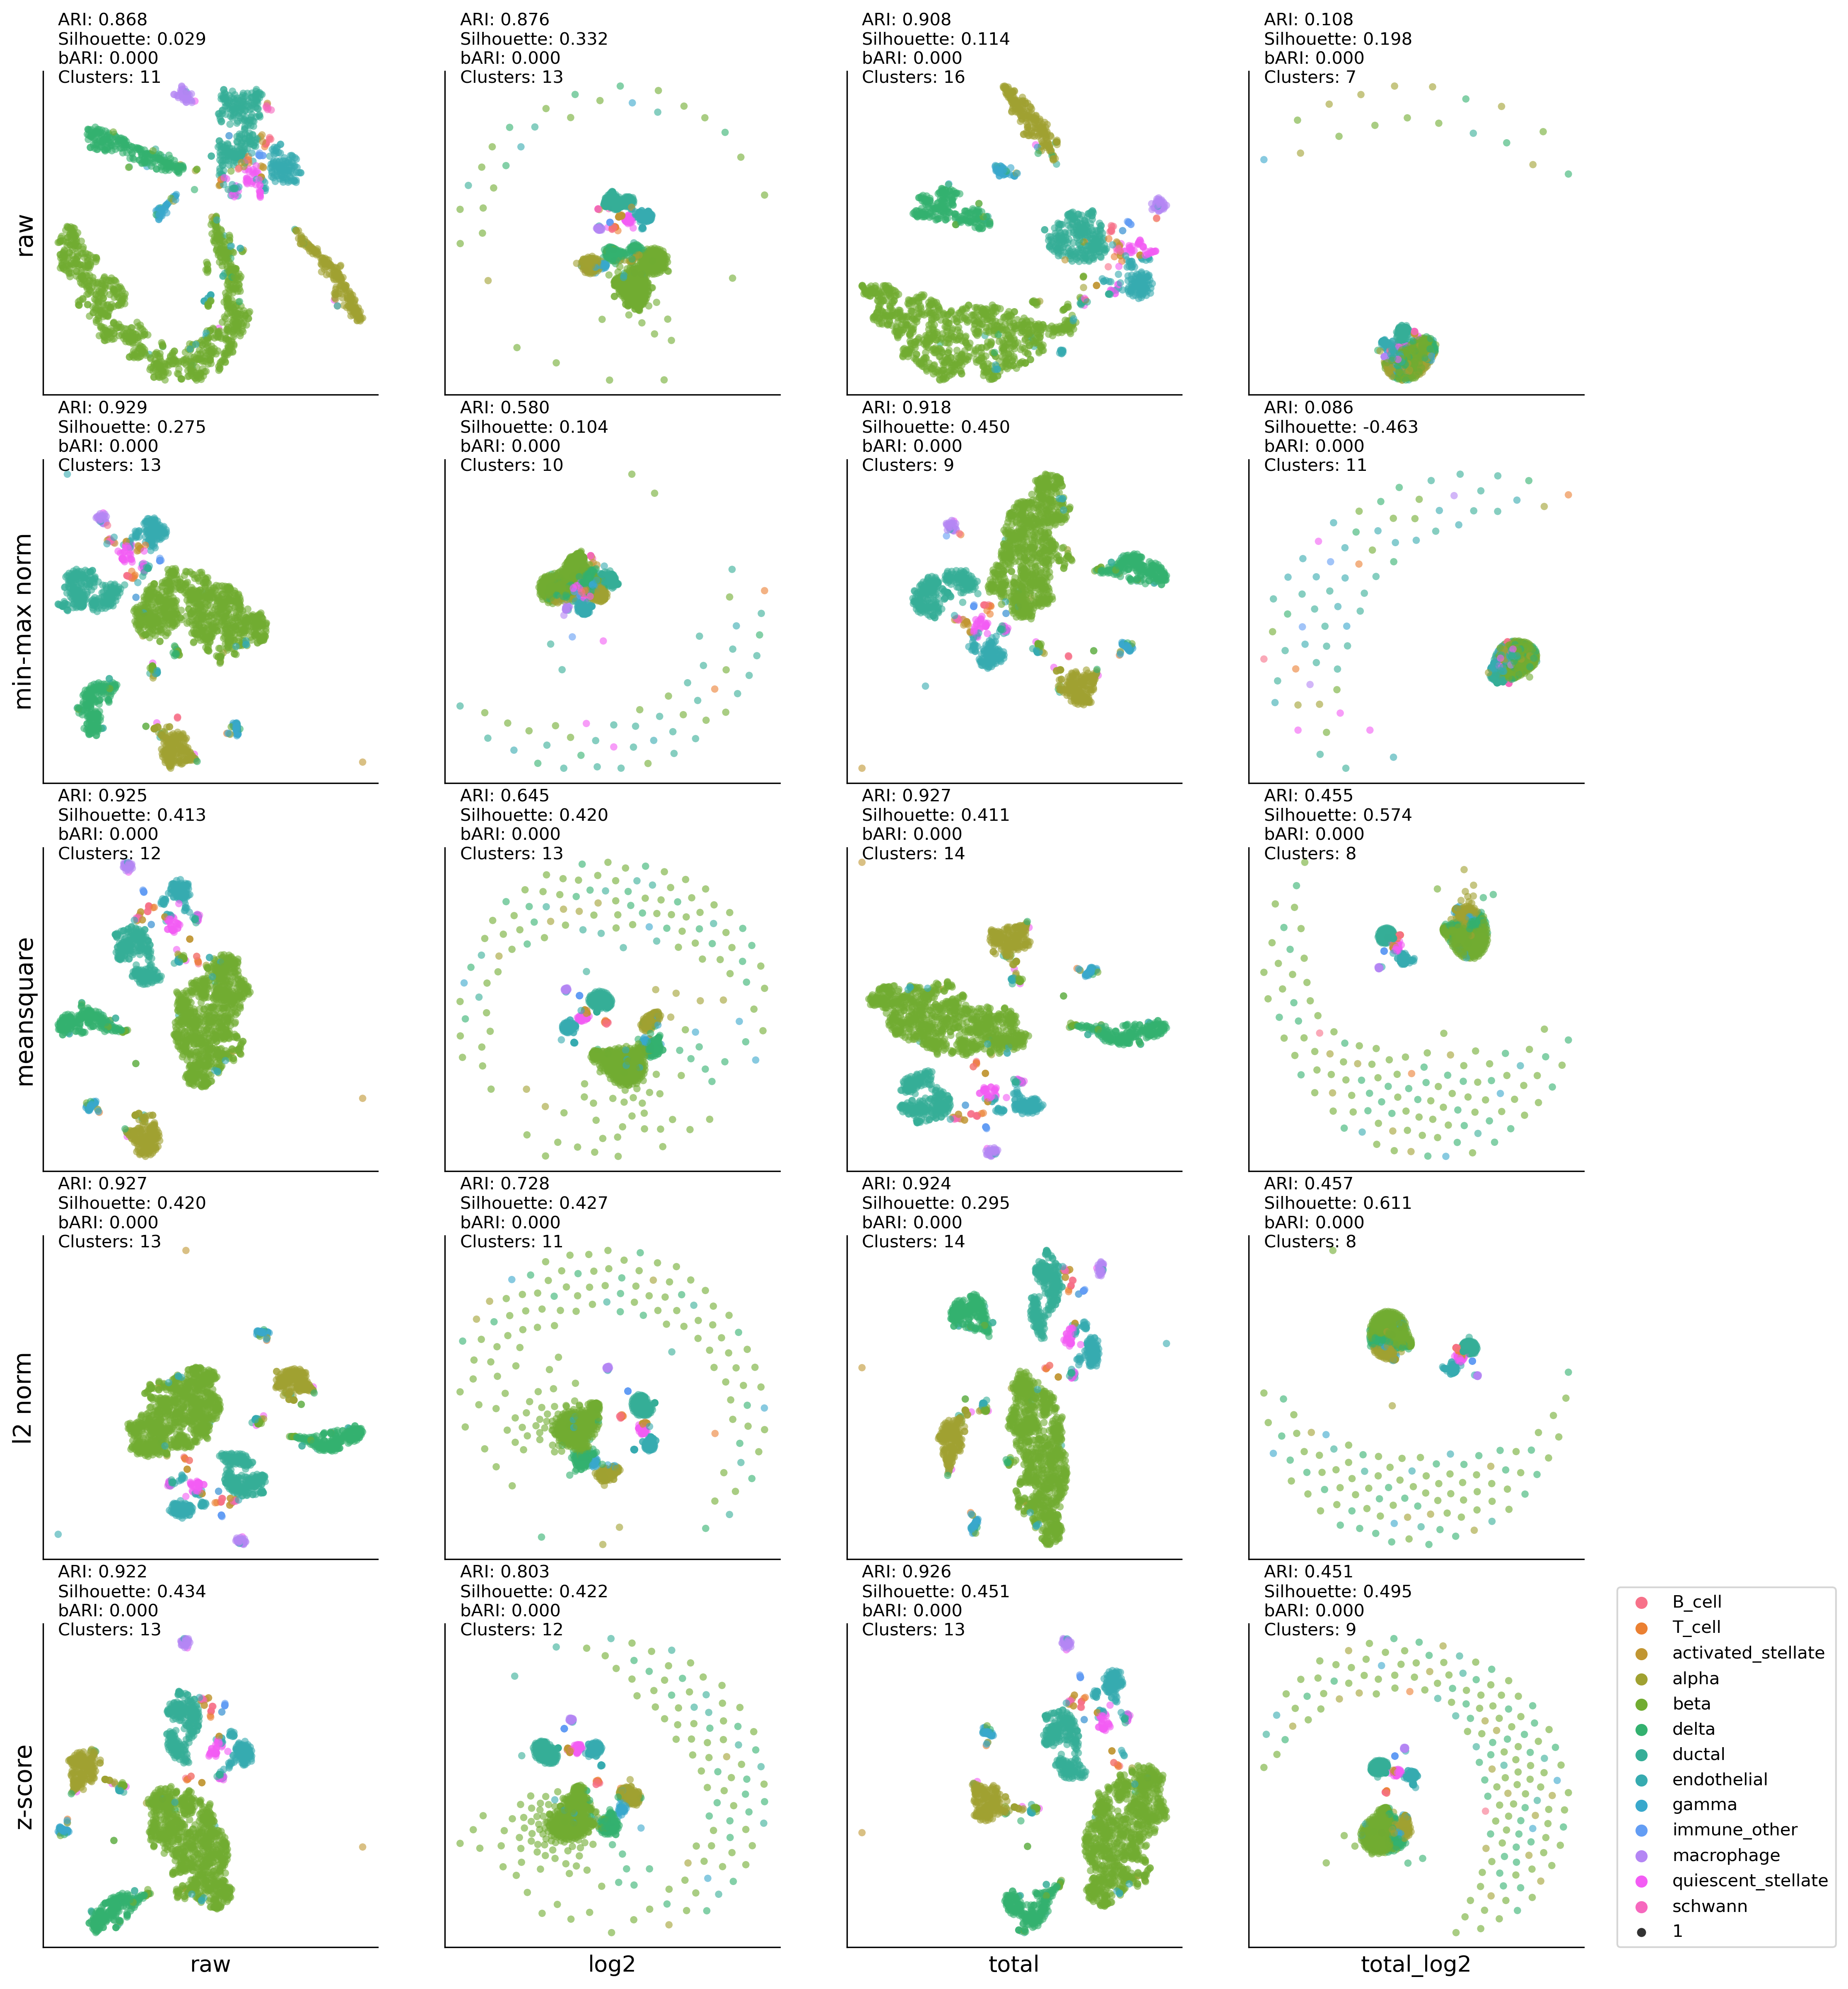

In [3]:
latent_space = TSNE(n_components=2)
#latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'dbscan'

############################################
plt.figure(figsize=(16,20), dpi=300)
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

## MP-UMAP:K-MEAN results

kmean #cluster: (6, 0.3864245024440032, 0.6554448, 0)
kmean #cluster: (6, 0.6058360691038376, 0.5852503, 0)
kmean #cluster: (7, 0.5863995852685349, 0.5876403, 0)
kmean #cluster: (12, 0.10399488916755839, 0.42762837, 0)
kmean #cluster: (7, 0.5882159795039702, 0.59157884, 0)
kmean #cluster: (8, 0.3270125295086325, 0.52000886, 0)
kmean #cluster: (7, 0.5877205821664601, 0.59157485, 0)
kmean #cluster: (8, 0.1105870987208216, 0.40665802, 0)
kmean #cluster: (8, 0.5971703945130681, 0.6056222, 0)
kmean #cluster: (7, 0.6687566054312175, 0.6596007, 0)
kmean #cluster: (8, 0.5971703945130681, 0.6056222, 0)
kmean #cluster: (6, 0.5174362755870877, 0.50187993, 0)
kmean #cluster: (8, 0.5971226955026593, 0.6072649, 0)
kmean #cluster: (7, 0.6580336805702159, 0.6369383, 0)
kmean #cluster: (8, 0.5971226955026593, 0.6072649, 0)
kmean #cluster: (6, 0.6208911681121498, 0.53514576, 0)
kmean #cluster: (8, 0.5959037961021104, 0.60610765, 0)
kmean #cluster: (7, 0.6590875991404909, 0.65312797, 0)
kmean #cluster: (

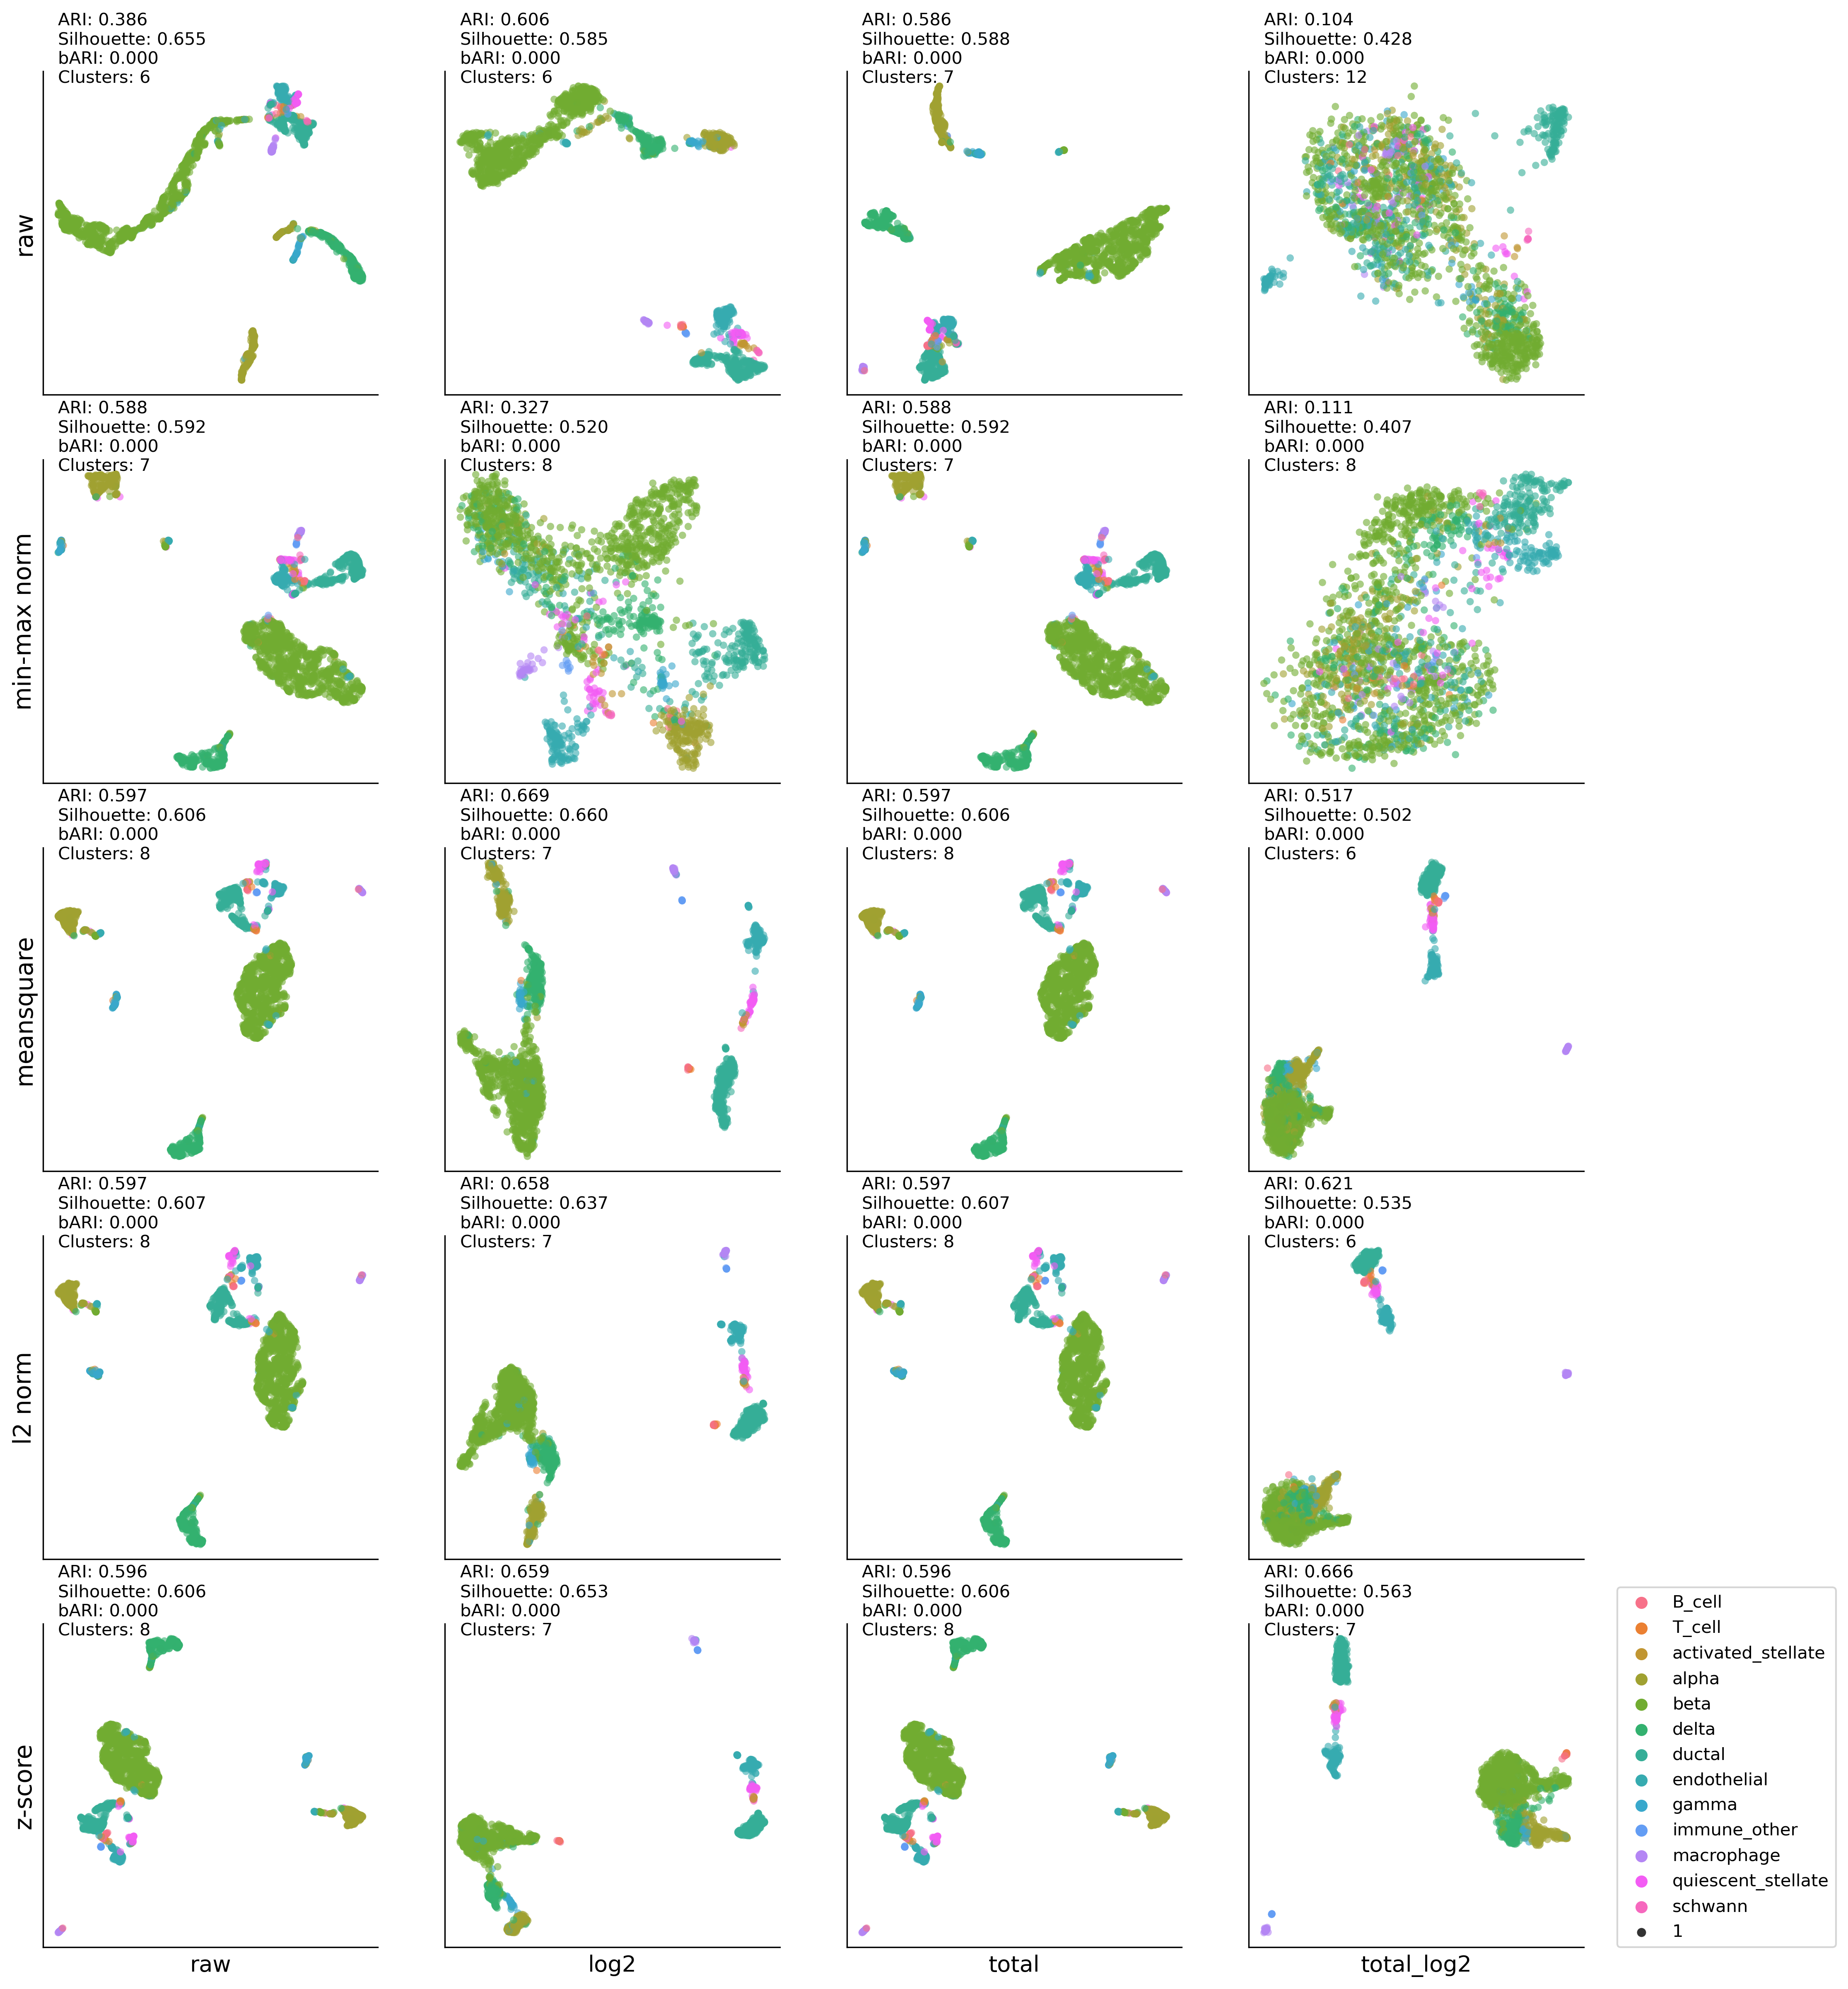

In [4]:
#latent_space = TSNE(n_components=2)
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'kmean'

############################################
plt.figure(figsize=(16,20), dpi=300)
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

## MP-UMAP:DBSCAN results

dbscan #cluster: (9, 0.8189694625026746, 0.32459468, 0)
dbscan #cluster: (5, 0.6184950049464866, 0.43408453, 0)
dbscan #cluster: (7, 0.8476973044394825, 0.6540196, 0)
dbscan #cluster: (4, 0.1125499473753923, 0.17110634, 0)
dbscan #cluster: (7, 0.8446717894527986, 0.58798665, 0)
dbscan #cluster: (0, 0, 0, 10)
dbscan #cluster: (7, 0.8446717894527986, 0.58798665, 0)
dbscan #cluster: (0, 0, 0, 10)
dbscan #cluster: (14, 0.9026649815743688, 0.55992705, 0)
dbscan #cluster: (9, 0.6948165946982616, 0.58400977, 0)
dbscan #cluster: (14, 0.9026649815743688, 0.55992705, 0)
dbscan #cluster: (3, 0.4230010513655186, 0.85879457, 0)
dbscan #cluster: (15, 0.9024552964092355, 0.53866494, 0)
dbscan #cluster: (8, 0.6870961736313181, 0.5095303, 0)
dbscan #cluster: (15, 0.9024552964092355, 0.53866494, 0)
dbscan #cluster: (4, 0.4269624548432078, 0.60620767, 0)
dbscan #cluster: (12, 0.8698784006789592, 0.3805181, 0)
dbscan #cluster: (10, 0.8804334612241462, 0.35704437, 0)
dbscan #cluster: (12, 0.8698784006789592, 0.3805181, 0)
dbscan #cluster: (7, 0.486535670771953, 0.47861925, 0)

![baron_mouse_umap_dbscan.png](baron_mouse_umap_dbscan.png)